
# 초급 딥러닝 미션: "인공지능 마법사의 첫 번째 신경망"

## 🎯 학습 목표
- 딥러닝 및 파이토치 기본 개념 이해
- 텐서 생성 및 조작
- `nn.Module` 기반 모델 작성
- 시퀀셜 모델 구성
- 손실함수, 옵티마이저, 학습 루프 직접 구현
- 정확도 등 메트릭 계산 및 시각화



## 📂 사용 데이터셋
**MNIST 손글씨 숫자 이미지** (10개 숫자 분류, 흑백 이미지)  
👉 `torchvision.datasets.MNIST`에서 자동 다운로드 가능



## 🧩 미션 구성

### Part 1. 딥러닝과 파이토치 개요  
❓ 문제 1  
**딥러닝이 머신러닝과 다른 점은 무엇인가요?**  
✔️ 정답:  딥러닝은 특징을 정해줘야하는 머신러닝과 다르게 자동으로 특징을 학습하고 다층 신경망을 사용한다

❓ 문제 2  
**파이토치의 핵심 구성 요소 3가지를 쓰세요.**  
✔️ 정답:텐서, nn.module, autograd



### Part 2. 텐서 연산 실습  
🔧 실습 문제 3  
아래 조건에 맞는 텐서를 생성하세요:  
- 3x3 크기의 정규분포 난수 텐서
- 모든 원소에 대해 ReLU 함수를 적용한 텐서

힌트: `torch.randn`, `torch.relu`


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 2. 텐서 연산 실습
# 3x3 정규분포 난수 텐서 생성
tensor = torch.randn(3, 3)
print("원본 텐서:")
print(tensor)

# ReLU 함수 적용
relu_tensor = torch.relu(tensor)
print("\nReLU 적용 텐서:")
print(relu_tensor)

원본 텐서:
tensor([[-0.2737, -0.1579, -0.6406],
        [-1.4939, -1.1398, -1.0682],
        [-1.4866,  1.2429,  1.5761]])

ReLU 적용 텐서:
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 1.2429, 1.5761]])



### Part 3. 신경망 직접 만들기  
🔧 실습 문제 4  
다음과 같은 신경망을 `nn.Module` 클래스를 상속받아 구현하세요:

- 입력: 28×28 이미지 → 784차원
- 은닉층: 128개 뉴런, 활성화 함수 ReLU
- 출력층: 10개 뉴런, 소프트맥스


In [5]:
# 3. nn.module 기반 신경망
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 128) #입력->은닉
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10) #은닉->출력

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MNISTClassifier()
print(model)

MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)



### Part 4. 시퀀셜 모델 구성  
🔧 실습 문제 5  
동일한 구조를 `nn.Sequential`을 사용하여 작성하세요.

힌트: `nn.Sequential(...)`


In [6]:
sequential_model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
print(sequential_model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)



### Part 5. 손실함수와 옵티마이저  
🔧 실습 문제 6  
다음 코드에서 손실함수와 옵티마이저를 정의하세요:

```python
model = MyNet()
# 손실 함수 정의
# 옵티마이저 정의
```

요구사항:
- 손실 함수: `CrossEntropyLoss`
- 옵티마이저: `SGD`, 학습률 0.01


# 모델 생성
model = MyNet()  # MyNet은 앞서 정의한 MNISTClassifier를 의미

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 옵티마이저 정의 (SGD, 학습률 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)


### Part 6. 데이터셋 및 데이터로더  
🔧 실습 문제 7  
`torchvision.datasets.MNIST`를 사용하여 학습 및 검증 데이터를 불러오고, `DataLoader`를 사용하여 배치 사이즈 64로 나누세요.


In [9]:
# 6. 데이터셋 및 데이터로더
transform = transforms.ToTensor()  # 'transforms'로 수정
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print(f"Train 데이터셋 크기: {len(trainset)}")
print(f"Test 데이터셋 크기: {len(testset)}")

Train 데이터셋 크기: 60000
Test 데이터셋 크기: 10000



### Part 7. 학습 루프 구현하기  
🔧 실습 문제 8  
기본적인 학습 루프를 구현하세요. 다음을 포함해야 합니다:
- 배치 단위 데이터 가져오기
- 예측값 계산 (`model(x)`)
- 손실 계산 및 역전파
- 파라미터 업데이트


Epoch 1/0, Loss: 1.2317
Epoch 2/1, Loss: 0.4952
Epoch 3/2, Loss: 0.3947
Epoch 4/3, Loss: 0.3537
Epoch 5/4, Loss: 0.3291


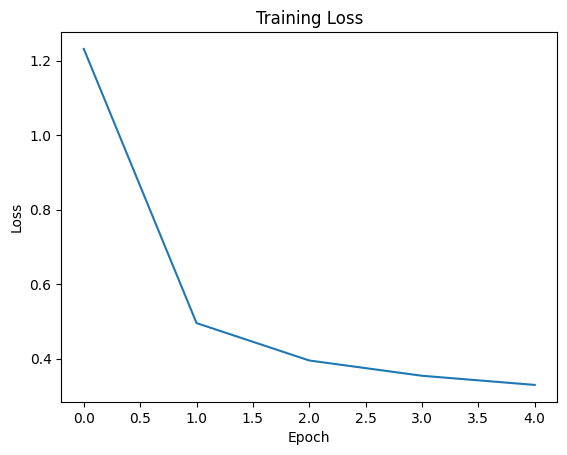

In [12]:
# 7. 학습루프 구현

# 모델 정의 (이미 앞에서 정의했다면 생략 가능)
model = MNISTClassifier()

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 옵티마이저 정의 (SGD, 학습률 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
learning_rate = 0.01

#손실 기록용 리스트
train_losses = []

#학습 루프
for epochs in range(epochs):
    model.train() #학습모드 설정
    epoch_loss = 0.0

    for batch_idx, (data, target) in enumerate(trainloader):
      # 기울기 초기화
        optimizer.zero_grad()

        # 예측값계산 (순전파)
        output = model(data)

        # 손실계산
        loss = criterion(output, target)

        #역전파
        loss.backward()

        #파라미터 업데이트
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)

    print(f"Epoch {epochs+1}/{epochs}, Loss: {avg_loss:.4f}")


### Part 8. 정확도(Accuracy) 계산  
🔧 실습 문제 9  
모델이 얼마나 잘 맞췄는지 정확도를 직접 계산하는 함수를 작성하세요.


In [14]:
# 정확도 계산 함수
def calculate_accuracy(model, dataloader):
  #평가모드로 전환
  model.eval()

  correct = 0
  total = 0

  #그래디언트 계산 비활성화
  with torch.no_grad():
    for data, target in dataloader:
      #예측 수행
      outputs = model(data)

      #최대 확률 가진 클래스 예측
      _, predicted = torch.max(outputs.data, 1)

      # 전체 샘플 수 누적
      total += target.size(0)

      # 맞게 예측한 샘플 수 누적
      correct += (predicted == target).sum().item()

      # 정확도 계산 (%)
    accuracy = 100 * correct / total
    return accuracy

# 테스트 데이터로 정확도 계산
test_accuracy = calculate_accuracy(model, testloader)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 91.45%



### Part 9. 학습 과정 시각화  
🔧 실습 문제 10  
에폭별 손실값을 저장하고 `matplotlib`을 이용해 학습 곡선을 시각화하세요.


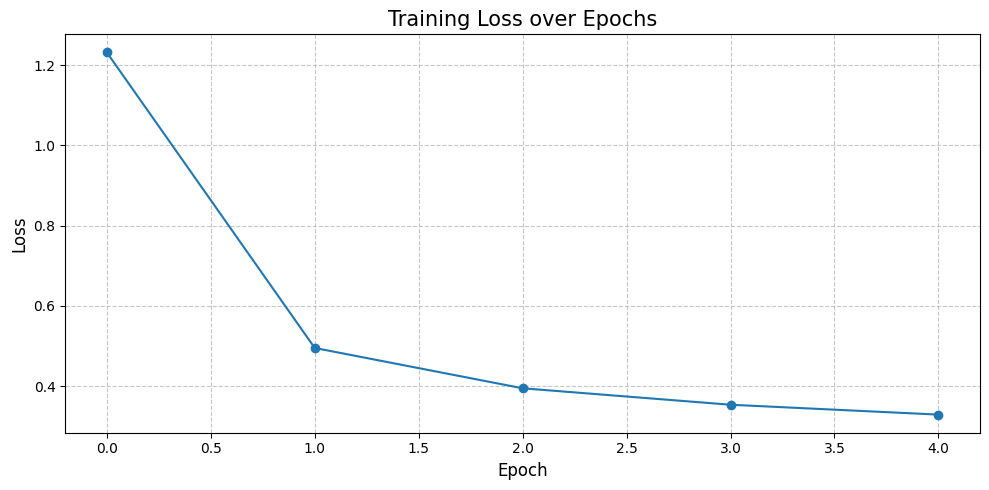

In [17]:
# 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_losses, marker='o')
plt.title('Training Loss over Epochs', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




## 🎁 보너스 미션  
- `nn.Module`과 `nn.Sequential` 방식의 모델을 비교  
- 옵티마이저를 Adam으로 바꾸고 학습 결과 비교  
- 은닉층 크기를 256으로 변경하여 과적합 여부 확인


## 🎯 보너스 문제 1: `nn.Module` vs `nn.Sequential` 모델을 예시를 들어 비교하시오.

In [18]:
# nn.Module 방식
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # 이미지 평탄화
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# nn.Sequential 방식
sequential_model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# 비교 분석
print("### nn.Module 모델 ###")
module_model = MNISTClassifier()
print(module_model)

print("\n### nn.Sequential 모델 ###")
print(sequential_model)

# 주요 차이점 설명
print("\n주요 차이점:")
print("1. nn.Module:")
print("- 복잡한 모델 구조 정의 가능")
print("- forward 메서드로 명시적 순전파 제어")
print("- 조건부 로직, 동적 계산 가능")

print("\n2. nn.Sequential:")
print("- 간단하고 순차적인 레이어 구성에 적합")
print("- 코드가 간결함")
print("- 고정된 순서의 레이어 쌓기에 용이")

### nn.Module 모델 ###
MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### nn.Sequential 모델 ###
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

주요 차이점:
1. nn.Module:
- 복잡한 모델 구조 정의 가능
- forward 메서드로 명시적 순전파 제어
- 조건부 로직, 동적 계산 가능

2. nn.Sequential:
- 간단하고 순차적인 레이어 구성에 적합
- 코드가 간결함
- 고정된 순서의 레이어 쌓기에 용이


## 🎯 보너스 문제 2: Optimizer SGD vs Adam 비교

### SGD vs Adam 비교 ###
SGD Optimizer - Epoch 1, Loss: 1.2465
SGD Optimizer - Epoch 2, Loss: 0.4947
SGD Optimizer - Epoch 3, Loss: 0.3936
SGD Optimizer - Epoch 4, Loss: 0.3536
SGD Optimizer - Epoch 5, Loss: 0.3289
SGD Optimizer - Test Accuracy: 91.47%


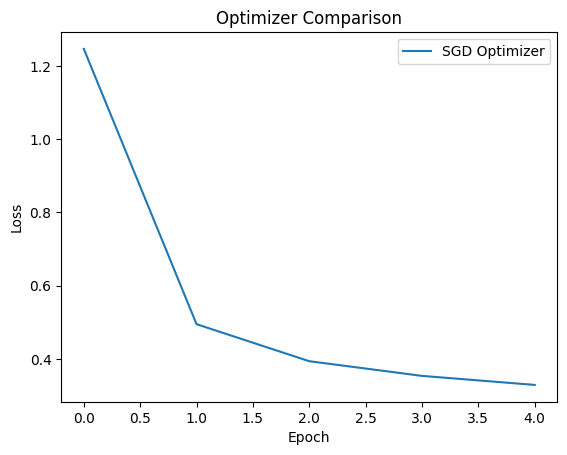

Adam Optimizer - Epoch 1, Loss: 0.3451
Adam Optimizer - Epoch 2, Loss: 0.1610
Adam Optimizer - Epoch 3, Loss: 0.1132
Adam Optimizer - Epoch 4, Loss: 0.0867
Adam Optimizer - Epoch 5, Loss: 0.0690
Adam Optimizer - Test Accuracy: 97.33%


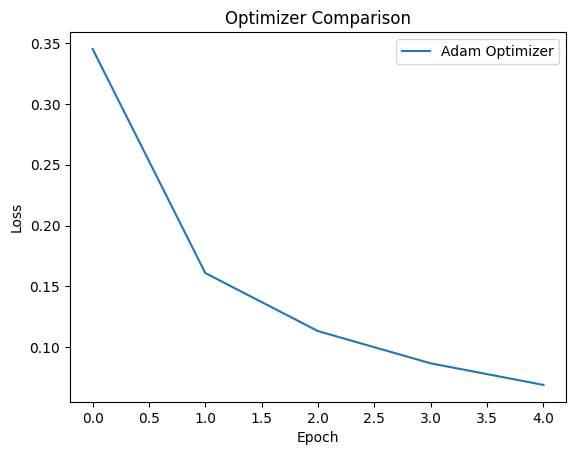

In [19]:
# SGD와 Adam 옵티마이저 비교
def train_and_compare_optimizers(model, train_loader, test_loader, optimizer_type='sgd'):
    # 손실 함수 정의
    criterion = nn.CrossEntropyLoss()

    # 옵티마이저 선택
    if optimizer_type.lower() == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        title = 'SGD Optimizer'
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        title = 'Adam Optimizer'

    # 학습 루프
    train_losses = []
    for epoch in range(5):
        model.train()
        epoch_loss = 0.0

        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"{title} - Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f"{title} - Test Accuracy: {accuracy:.2f}%")

    # 손실 곡선 시각화
    plt.plot(train_losses, label=title)
    plt.title('Optimizer Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return accuracy

# 모델 초기화
sgd_model = MNISTClassifier()
adam_model = MNISTClassifier()

# 옵티마이저 비교
print("### SGD vs Adam 비교 ###")
sgd_accuracy = train_and_compare_optimizers(sgd_model, trainloader, testloader, 'sgd')
adam_accuracy = train_and_compare_optimizers(adam_model, trainloader, testloader, 'adam')

## 🎯 보너스 문제 3: 은닉층 크기 변경 (128 → 256)

Epoch 1 - Train Loss: 0.2983, Test Loss: 0.1499
Epoch 2 - Train Loss: 0.1249, Test Loss: 0.1124
Epoch 3 - Train Loss: 0.0835, Test Loss: 0.0848
Epoch 4 - Train Loss: 0.0599, Test Loss: 0.0767
Epoch 5 - Train Loss: 0.0457, Test Loss: 0.0766
Epoch 6 - Train Loss: 0.0354, Test Loss: 0.0707
Epoch 7 - Train Loss: 0.0268, Test Loss: 0.0731
Epoch 8 - Train Loss: 0.0221, Test Loss: 0.0728
Epoch 9 - Train Loss: 0.0162, Test Loss: 0.0802
Epoch 10 - Train Loss: 0.0139, Test Loss: 0.0711


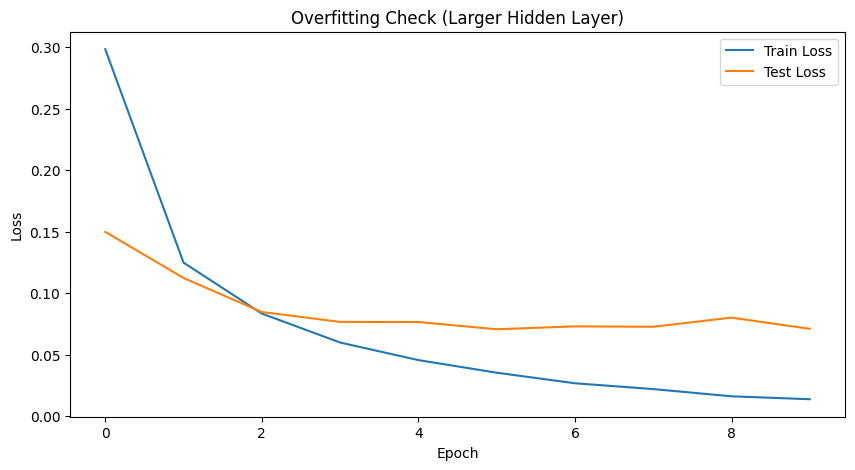

In [20]:
# 은닉층 크기를 256으로 변경한 모델
class LargerMNISTClassifier(nn.Module):
    def __init__(self):
        super(LargerMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # 은닉층 크기 256으로 변경
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 학습 및 과적합 확인
def check_overfitting(model, train_loader, test_loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []

    for epoch in range(10):  # 에폭 수 늘려서 과적합 확인
        # 학습
        model.train()
        train_epoch_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_epoch_loss += loss.item()

        train_avg_loss = train_epoch_loss / len(train_loader)
        train_losses.append(train_avg_loss)

        # 검증
        model.eval()
        test_epoch_loss = 0.0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_epoch_loss += loss.item()

        test_avg_loss = test_epoch_loss / len(test_loader)
        test_losses.append(test_avg_loss)

        print(f"Epoch {epoch+1} - Train Loss: {train_avg_loss:.4f}, Test Loss: {test_avg_loss:.4f}")

    # 학습/검증 손실 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Overfitting Check (Larger Hidden Layer)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 과적합 확인
larger_model = LargerMNISTClassifier()
check_overfitting(larger_model, trainloader, testloader)